## TP 2 – Clustering et classification

In [131]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

In [10]:
df=pd.read_csv('md_for_Python.csv',sep=';')

In [11]:
df.head()

,name,top.i,bottom.i,top.c,bottom.c,top.pm,bottom.pm,top.m,bottom.m
0,Opossum,5,4,1,1,3,3,4,4
1,Hairy tail mole,3,3,1,1,4,4,3,3
2,Common mole,3,2,1,0,3,3,3,3
3,Star nose mole,3,3,1,1,4,4,3,3
4,Brown bat,2,3,1,1,3,3,3,3


In [12]:
df.shape

(66, 9)

In [51]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df.drop(['name'],axis=1))
    wcss.append(kmeans.inertia_)

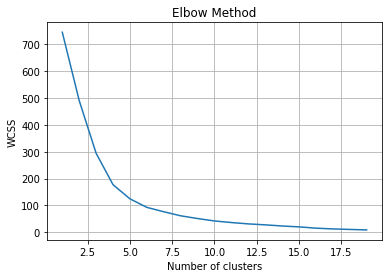

In [53]:
# Plot the WCSS to see the elbow
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [62]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
   kmeans.fit(df.drop(['name'],axis=1))
   score = silhouette_score(df.drop(['name'],axis=1), kmeans.labels_)
   silhouette_coefficients.append(score)

* Silhouette Score:

- This method measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the graph of the silhouette score peaks at a certain number of clusters, this is considered the best number of clusters.

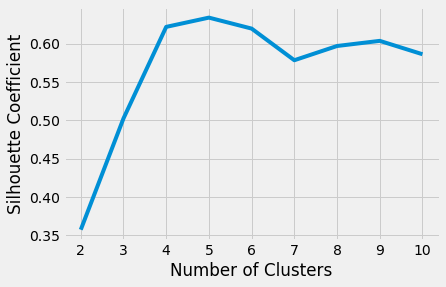

In [63]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [28]:
k = 5  # for example, replace with the number of clusters you determined
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df.drop(['name'],axis=1))

In [ ]:
# Add the cluster data to the original dataframe
df['Cluster'] = clusters

# Now you can analyze the data based on clusters
print(df.head())

In [31]:
df

,name,top.i,bottom.i,top.c,bottom.c,top.pm,bottom.pm,top.m,bottom.m,Cluster
0,Opossum,5,4,1,1,3,3,4,4,5
1,Hairy tail mole,3,3,1,1,4,4,3,3,5
2,Common mole,3,2,1,0,3,3,3,3,5
3,Star nose mole,3,3,1,1,4,4,3,3,5
4,Brown bat,2,3,1,1,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...
61,Antelope,0,4,0,0,3,3,3,3,0
62,Bison,0,4,0,0,3,3,3,3,0
63,Mountain goat,0,4,0,0,3,3,3,3,0
64,Musk ox,0,4,0,0,3,3,3,3,0


In [40]:
df1=pd.read_csv('md_for_Python.csv',sep=';')
df2=pd.read_csv('md_classes.csv',sep=';')

In [41]:
df2.columns

Index(['name', 'top.i', 'bottom.i', 'top.c', 'bottom.c', 'top.pm', 'bottom.pm',
       'top.m', 'bottom.m', 'zoo.class'],
      dtype='object')

In [49]:
df2['zoo.class'].unique()

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [66]:
X=df.drop(['name'],axis=1)

In [67]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(X)
dbscan.fit(X)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(X, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(X, dbscan.labels_).round (2)

In [68]:
kmeans_silhouette

0.63

In [69]:
dbscan_silhouette

0.29

The silhouette coefficient is higher for the k-means algorithm. The DBSCAN algorithm appears to find more natural clusters according to the shape of the data:

In [71]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [72]:
df2=pd.read_csv('md_classes.csv',sep=';')

In [76]:
ari_kmeans = adjusted_rand_score(df2['zoo.class'].values, kmeans.labels_)
ari_dbscan = adjusted_rand_score(df2['zoo.class'].values, dbscan.labels_)

In [77]:
ari_kmeans

0.44662624439992393

In [78]:
ari_dbscan

0.1398676719495307

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

In [118]:
ari_km=[]
silh_km=[]
for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.drop(['name','Cluster'],axis=1))
    ari_kmeans = adjusted_rand_score(df2['zoo.class'].values, kmeans.labels_)
    ari_km.append(ari_kmeans)
    silh_km.append(silhouette_score(df.drop(['name','Cluster'],axis=1), kmeans.labels_))

In [115]:
len(silh_km)

18

L'Adjusted Rand Index (ARI) est une mesure d'évaluation de la qualité d'un clustering qui compare les regroupements obtenus avec les regroupements réels (ou ground truth) ajustés pour le hasard. L'ARI varie de -1 à 1, où :

- 1 indique une correspondance parfaite entre les regroupements obtenus et les regroupements réels.
- 0 indique que les regroupements obtenus sont équivalents à ce que l'on pourrait obtenir par hasard.
- -1 indique une discordance totale entre les regroupements obtenus et les regroupements réels.

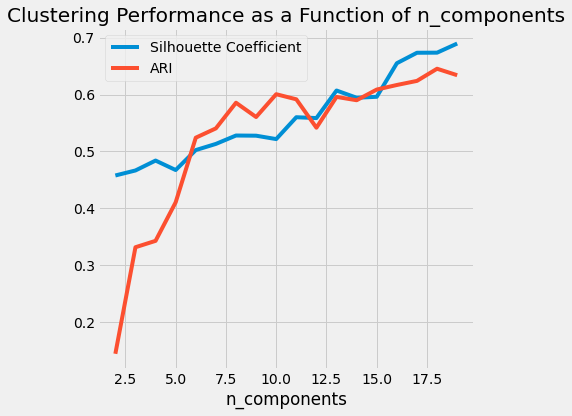

In [119]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(range(2, 20),silh_km,c="#008fd5",label="Silhouette Coefficient",)
plt.plot(range(2, 20), ari_km, c="#fc4f30", label="ARI")
plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

In [129]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  3,  3,  3, -1,  3,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  4,  4, -1,  4,  4,  4,  4,  4],
      dtype=int64)

### Classification

In [142]:
data=pd.read_csv('md_classes.csv',sep=';')

In [133]:
data.head()

,name,top.i,bottom.i,top.c,bottom.c,top.pm,bottom.pm,top.m,bottom.m,zoo.class
0,Opossum,5,4,1,1,3,3,4,4,15
1,Hairy tail mole,3,3,1,1,4,4,3,3,14
2,Common mole,3,2,1,0,3,3,3,3,14
3,Star nose mole,3,3,1,1,4,4,3,3,14
4,Brown bat,2,3,1,1,3,3,3,3,13


In [134]:
import seaborn as sns

In [136]:
data[data['zoo.class']==2]

,name,top.i,bottom.i,top.c,bottom.c,top.pm,bottom.pm,top.m,bottom.m,zoo.class
56,Peccary,2,3,1,1,3,3,3,3,2


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zoo.class', ylabel='count'>

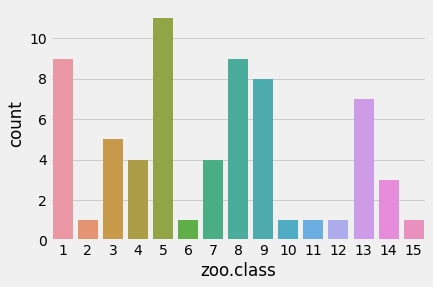

In [143]:
sns.countplot(data['zoo.class'])

In [144]:
data['zoo.class'].value_counts()

5     11
8      9
1      9
9      8
13     7
3      5
7      4
4      4
14     3
15     1
12     1
11     1
10     1
6      1
2      1
Name: zoo.class, dtype: int64

In [145]:
data = data[~data['zoo.class'].isin([15, 12, 11, 10, 6, 2])]

In [147]:
data.head()

,name,top.i,bottom.i,top.c,bottom.c,top.pm,bottom.pm,top.m,bottom.m,zoo.class
1,Hairy tail mole,3,3,1,1,4,4,3,3,14
2,Common mole,3,2,1,0,3,3,3,3,14
3,Star nose mole,3,3,1,1,4,4,3,3,14
4,Brown bat,2,3,1,1,3,3,3,3,13
5,Silver hair bat,2,3,1,1,2,3,3,3,13


In [151]:
data['zoo.class'].value_counts().index

Int64Index([5, 8, 1, 9, 13, 3, 7, 4, 14], dtype='int64')

In [152]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['zoo.class'] = label_encoder.fit_transform(data['zoo.class'])

In [154]:
data['zoo.class'].unique()

array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only

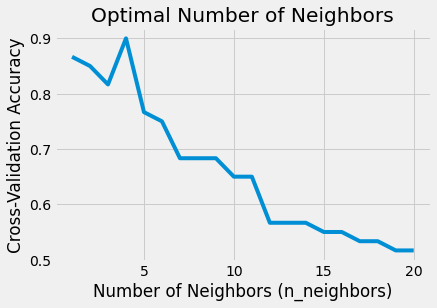

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming 'X' contains your features and 'y' contains the target variable
X = data.drop(['zoo.class','name'], axis=1)
y = data['zoo.class']

# Create a list of possible n_neighbors values to try
neighbors = list(range(1, 21))

# Calculate cross-validation scores for each value of n_neighbors
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # You can use a different scoring metric if needed
    cv_scores.append(np.mean(scores))

# Plotting the cross-validation scores for different values of n_neighbors
import matplotlib.pyplot as plt
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal Number of Neighbors')
plt.show()

In [160]:
# Find the optimal value of n_neighbors with the highest cross-validation score
optimal_k = neighbors[np.argmax(cv_scores)]
print(f"The optimal value for n_neighbors is {optimal_k}")

The optimal value for n_neighbors is 4


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains your features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the K-nearest neighbors classifier with the optimal n_neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[3 0 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 2 0 0]
 [0 0 0 0 0 0 0 4 0]
 [0 0 0 0 1 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         3
           2       0.50      1.00      0.67         1
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         1

    accuracy                           0.67        18
   macro avg       0.44      0.48      0.45        18
weighted avg       0.67      0.67      0.65        18



C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\